# CMPE547 Hw2

### 1. Import and Visualize Data

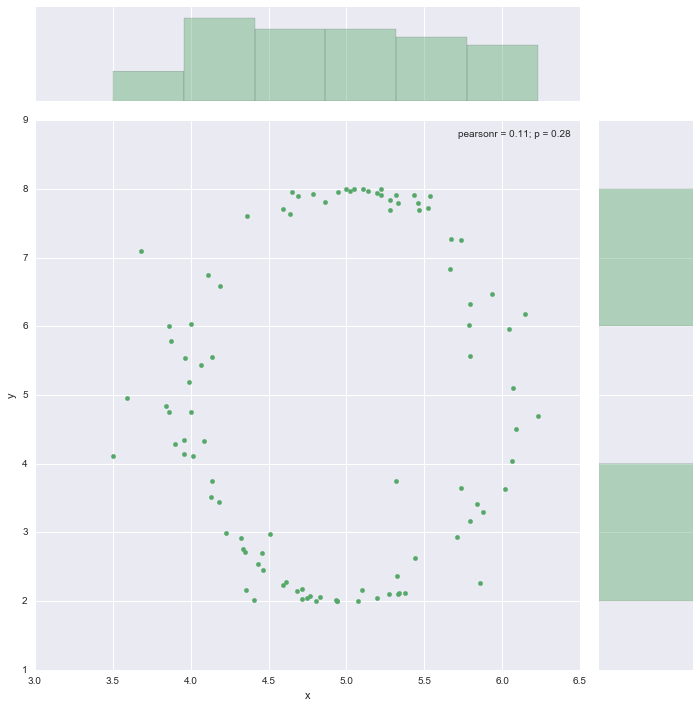

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = np.genfromtxt('data.txt', delimiter=' ',skip_header=1)
x1=data[:,0]
x2=data[:,1]

sns.set(color_codes=True)
df = pd.DataFrame(data, columns=['x','y'])
sns.jointplot(x="x", y="y", data=df,size=10,color="g");
plt.axis('equal')
plt.show()

### 2. Propose A Model

The distribution of the data looks like an ellipse, given by the parametric function:


\begin{equation*}
X=x_c+cos(\tau)acos(t)-sin(\tau)bsin(t)\\
Y=y_c+sin(\tau)acos(t)+cos(\tau)bsin(t)
\end{equation*}

which can be written in matrix form as:

\begin{equation*}
\left[ \begin{array}{c}x(t)\\y(t)\end{array}\right]=
\left[ \begin{array}{c}x_c\\y_c\end{array}\right] +
\begin{bmatrix} cos(\tau)&-sin(\tau)\\sin(\tau)&cos(\tau)\end{bmatrix}\times
\left[ \begin{array}{c}acos(t)\\bsin(t)\end{array}\right]
\end{equation*}

where 

* x<sub>c</sub> and y<sub>c</sub> are the coordinates of the ellipse center,
* a and b are major and minor radii respectively,
* $ \tau $ is the counterclockwise tilt

The generative model is therefore as follows:

\begin{equation*}
w\sim\mathcal{U}(0,1)\\
u=\left[\begin{array}{c}acos(2\pi w)\\bsin(2\pi w)\end{array}\right]\\
E=\left[\begin{array}{c}
X=C+Tu+E
\end{equation*}

where 

* C is the center points vector
* T is the tilt matrix
* E is the system noise

### 3-4. Implement, Sample and Visualize Model Data

x1=[ 5.6535089   4.47492239  4.03612689  5.7329511   4.26282408  4.4688393
  4.07848359  5.18856779  4.16237867  5.64013798  4.20183762  5.54920146
  4.36768655  5.37991303  4.90304534  6.02625292  6.04155188  4.80703148
  4.15084828  4.46627592  5.89626748  4.21629232  5.52906299  4.51129802
  6.04967563  4.48143398  4.93635523  5.32088812  4.81021986  3.95317712
  6.05011241  4.49965537  3.8010377   5.56956404  5.85597388  4.84932883
  4.11258053  5.77948878  4.19321672  4.47235476  4.16727981  3.98418523
  4.90361572  5.32964438  5.82403288  6.05510739  5.88117216  4.78350492
  4.06580055  5.0907102   4.07845481  4.44863449  5.22445214  4.85112497
  4.2498573   5.69525961  5.07176759  5.1161981   4.11462973  5.97194379
  5.62805916  6.13179969  4.6994727   4.21528514  5.7539405   5.749575
  6.23410313  6.03756921  5.54022648  4.27932115  4.58744222  5.10567746
  4.57536228  5.13381725  4.78898939  5.15559334  4.0843678   5.73511041
  4.40467746  4.2055039   3.8217636   4.47009051  3

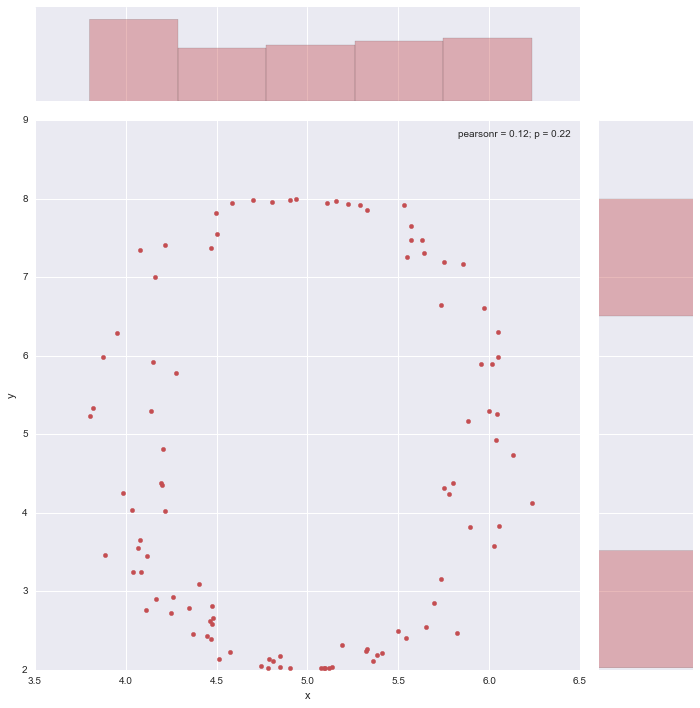

In [18]:
N=x1.shape[0]
center=np.array([[5],[5]])           # (x,y) center
a=3                                  # major radius
b=1                                  # minor radius
x1_noise=0.15                        # x1 noise scale
x2_noise=0.05                        # x2 noise scale

# tilt matrix(90 degree tilt)
tilt=np.array([[np.cos(np.pi/2.0),-np.sin(np.pi/2.0)],[np.sin(np.pi/2.0),np.cos(np.pi/2.0)]])

w=np.random.rand(N)                  # uniform distribution
u=np.array([a*np.cos(w*2*np.pi),b*np.sin(w*2*np.pi)]) 
X=np.dot(tilt,u)                     # tilt ellipse 90 degrees counter-clockwise
e1=x1_noise*np.random.randn(N)       # noise on x1
e2=x2_noise*w#np.random.rand(N)        # noise on x2
E=np.mat([e1,e2]);
X+=center
X+=E

print 'x1=%s'%+X[0,:]
print 'x2=%s'%+X[1,:]

sns.set(color_codes=True)
df = pd.DataFrame(X.T, columns=['x','y'])
sns.jointplot(x="x", y="y", data=df,size=10,color="r");
plt.axis('equal')
plt.show()

### 5. Data Similarity Discussion

To asses the similarity of two datasets we can compare their means and variances. It is logical to assume that the two datasets are similar given that their means and variances are similar. Another test function that can be checked is the correlation between the two datasets. 